#### Notebook 5: GridSearchCV/ Logistic Regression Classifier

In [56]:
# Generic Imports
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format="retina"

In [2]:
#read in data
X3 = joblib.load("../data/train_df.pkl")
y3 = joblib.load("../data/y_train.pkl")

X3_uni = joblib.load("../data/uni_trained.pkl")
y3_uni = joblib.load("../data/y_train.pkl")

X3_test = joblib.load("../data/test_df.pkl") 
y3_test = joblib.load("../data/y_test.pkl")

X3_test_uni = joblib.load("../data/uni_test.pkl")

In [3]:
#Build pipeline
estims = [('LR', LogisticRegression(random_state=42))]

my_pipe = Pipeline(estims)

We are using a pipeline and parameter grid to help find the best hyperparameters for our model.

The first thing for us to do is to create a pipeline that applies our vectorizer and regularization.

#### Hyperparameter Optimization

Once the pipeline is built, we then build our parameter grid to find our best hyperparamters for our model.

*Hyperparameters*:
- max_features
- ngram_range
- C score
- max_iterations 

In [4]:
#Hyperparameter optimization
logreg_param_grid = {'LR__C': [1, 10, 100, 1000],
                      'LR__max_iter':[10000]}

In [5]:
from sklearn.model_selection import GridSearchCV

logreg_grid = GridSearchCV(my_pipe,logreg_param_grid, cv=5, verbose=2, n_jobs=-1 , refit=True)
logreg_grid.fit(X3, y3)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[CV] END ........................LR__C=1, LR__max_iter=10000; total time=   5.1s
[CV] END ........................LR__C=1, LR__max_iter=10000; total time=   5.1s
[CV] END ........................LR__C=1, LR__max_iter=10000; total time=   5.2s
[CV] END ........................LR__C=1, LR__max_iter=10000; total time=   5.3s
[CV] END ........................LR__C=1, LR__max_iter=10000; total time=   2.8s
[CV] END .......................LR__C=10, LR__max_iter=10000; total time=   4.0s
[CV] END .......................LR__C=10, LR__max_iter=10000; total time=   4.8s
[CV] END .......................LR__C=10, LR__max_iter=10000; total time=   4.8s
[CV] END .......................LR__C=10, LR__max_iter=10000; total time=   5.2s
[CV] END .......................LR__C=10, LR__max_iter=10000; total time=   4.1s
[CV] END ......................LR__C=100, LR__max_iter=10000; total time=   4.7s
[CV] END ......................LR__C=100, LR__max_iter=10000; total time=   5.2s
[CV] END ...................

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('LR',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'LR__C': [1, 10, 100, 1000], 'LR__max_iter': [10000]},
             verbose=2)

In [6]:
#Best parameters as a reult of pipeline
logreg_grid.best_params_

{'LR__C': 10, 'LR__max_iter': 10000}

In [7]:
best_model = logreg_grid.best_estimator_

Now that we have a model that the gridsearch recommends, we will plot the coefficients from that model to assess the most influential features for positive and negative sentiment as a comparison

In [8]:
#Instantiate and fit model on train set
best_logreg = LogisticRegression(C=100, max_iter= 10000)
best_logreg.fit(X3, y3)

best_logreg.score(X3, y3)

0.8198002512830341

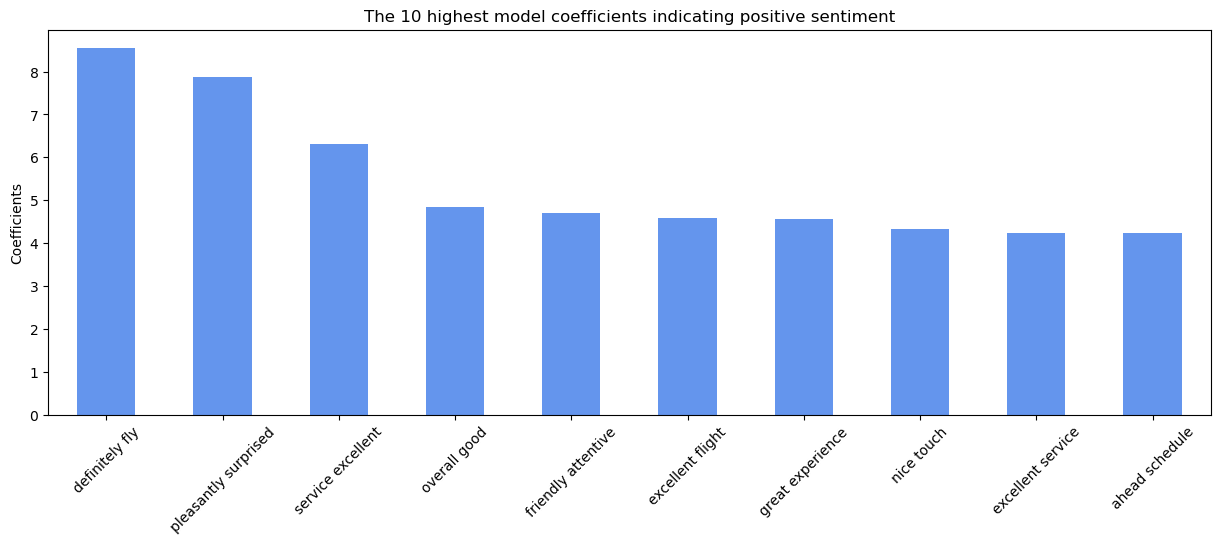

In [9]:
#plotting coefficients
best_pos_freq = pd.DataFrame(
    {"coefficients": best_logreg.coef_[0]},
    index=X3.columns
).sort_values("coefficients", ascending=False)

best_pos_freq.head(10).plot(kind="bar", figsize=(15, 5), legend=False, color='cornflowerblue')
plt.title("The 10 highest model coefficients indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

In [10]:
best_pos_freq.head(10)

,coefficients
definitely fly,8.548945
pleasantly surprised,7.867708
service excellent,6.314858
overall good,4.840937
friendly attentive,4.707820
excellent flight,4.578412
great experience,4.552529
nice touch,4.321876
excellent service,4.245469
ahead schedule,4.239566


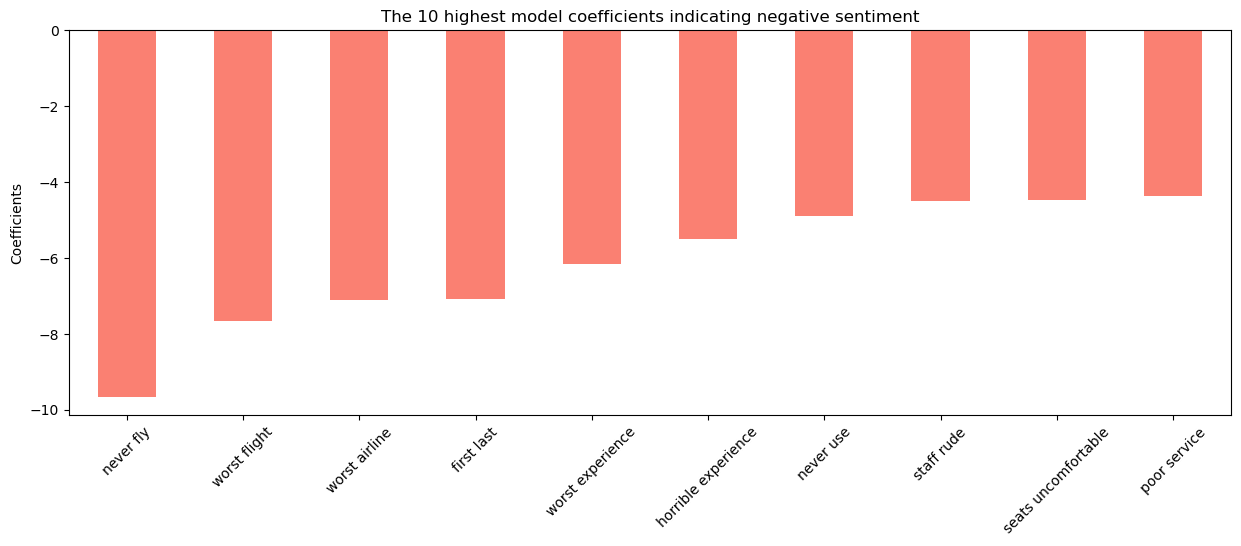

In [11]:
best_neg_freq = pd.DataFrame(
    {"coefficients": best_logreg.coef_[0]},
    index=X3.columns
).sort_values("coefficients", ascending=True)

best_neg_freq.head(10).plot(kind="bar", figsize=(15, 5), legend=False, color='salmon')
plt.title("The 10 highest model coefficients indicating negative sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

In [12]:
best_neg_freq.head(10)

,coefficients
never fly,-9.659241
worst flight,-7.669540
worst airline,-7.111166
first last,-7.087759
worst experience,-6.166217
horrible experience,-5.503224
never use,-4.903502
staff rude,-4.505489
seats uncomfortable,-4.471571
poor service,-4.363019


In [13]:
#assessing best model accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

logreg_accuracy_pred_bi = best_logreg.predict(X3_test)

report_final = classification_report(y3_test, logreg_accuracy_pred_bi)
print(report_final)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      6099
           1       0.81      0.80      0.80      5641

    accuracy                           0.81     11740
   macro avg       0.81      0.81      0.81     11740
weighted avg       0.81      0.81      0.81     11740



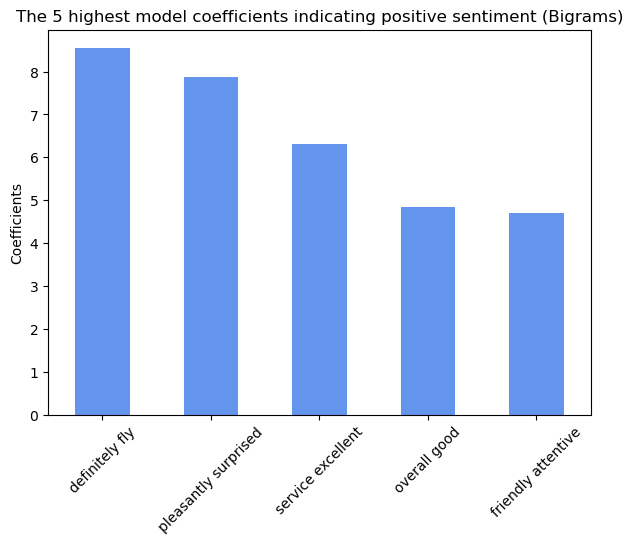

In [14]:
#plotting coefficients
best_pos_freq_test_bi = pd.DataFrame(
    {"coefficients": best_logreg.coef_[0]},
    index=X3_test.columns
).sort_values("coefficients", ascending=False)

best_pos_freq_test_bi.head(5).plot(kind="bar", figsize=(7, 5), legend=False, color= 'cornflowerblue')
plt.title("The 5 highest model coefficients indicating positive sentiment (Bigrams)")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

In [15]:
best_pos_freq_test_bi.head(5)

,coefficients
definitely fly,8.548945
pleasantly surprised,7.867708
service excellent,6.314858
overall good,4.840937
friendly attentive,4.707820


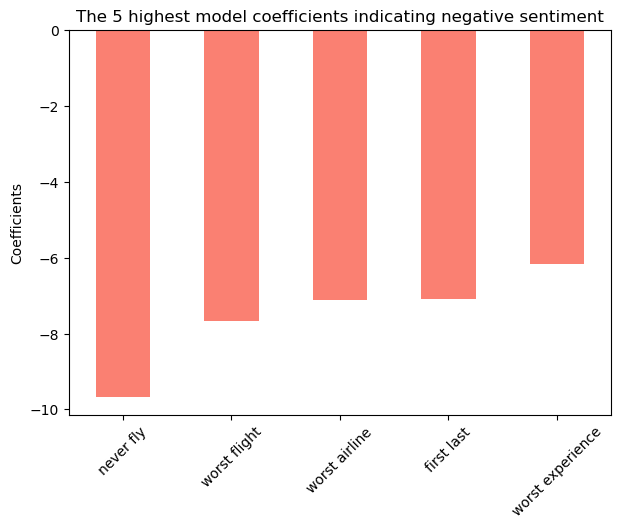

In [16]:
#plotting coefficients
best_neg_freq_test_bi = pd.DataFrame(
    {"coefficients": best_logreg.coef_[0]},
    index=X3_test.columns
).sort_values("coefficients", ascending=True)

best_neg_freq_test_bi.head(5).plot(kind="bar", figsize=(7, 5), legend=False, color='salmon')
plt.title("The 5 highest model coefficients indicating negative sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

In [17]:
best_neg_freq_test_bi.head(5)

,coefficients
never fly,-9.659241
worst flight,-7.669540
worst airline,-7.111166
first last,-7.087759
worst experience,-6.166217


In [18]:
from sklearn.metrics import classification_report

logreg_accuracy_pred_bi = best_logreg.predict(X3_test)

report_final = classification_report(y3_test, logreg_accuracy_pred_bi)
print(report_final)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      6099
           1       0.81      0.80      0.80      5641

    accuracy                           0.81     11740
   macro avg       0.81      0.81      0.81     11740
weighted avg       0.81      0.81      0.81     11740



In [32]:
logreg_uni = LogisticRegression(C=100, max_iter=10000)
logreg_uni.fit(X3_uni,y3)

logreg_accuracy_pred_uni = logreg_uni.predict(X3_test_uni)

report_final_uni = classification_report(logreg_accuracy_pred_uni, y3_test)
print(report_final)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      6099
           1       0.81      0.80      0.80      5641

    accuracy                           0.81     11740
   macro avg       0.81      0.81      0.81     11740
weighted avg       0.81      0.81      0.81     11740



In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred =logreg_uni.predict(X3_test_uni)

# Generate confusion matrix
cf_matrix = confusion_matrix(y3_test, y_pred, normalize='true')

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Negative", "Predicted Positive"],
    index=["True Negative", "True Positive"]
)

display(cf_df)

,Predicted Negative,Predicted Positive
True Negative,0.900639,0.099361
True Positive,0.116291,0.883709


(array([0.5, 1.5]),
 [Text(0.5, 0, 'Predicted Negative'), Text(1.5, 0, 'Predicted Positive')])

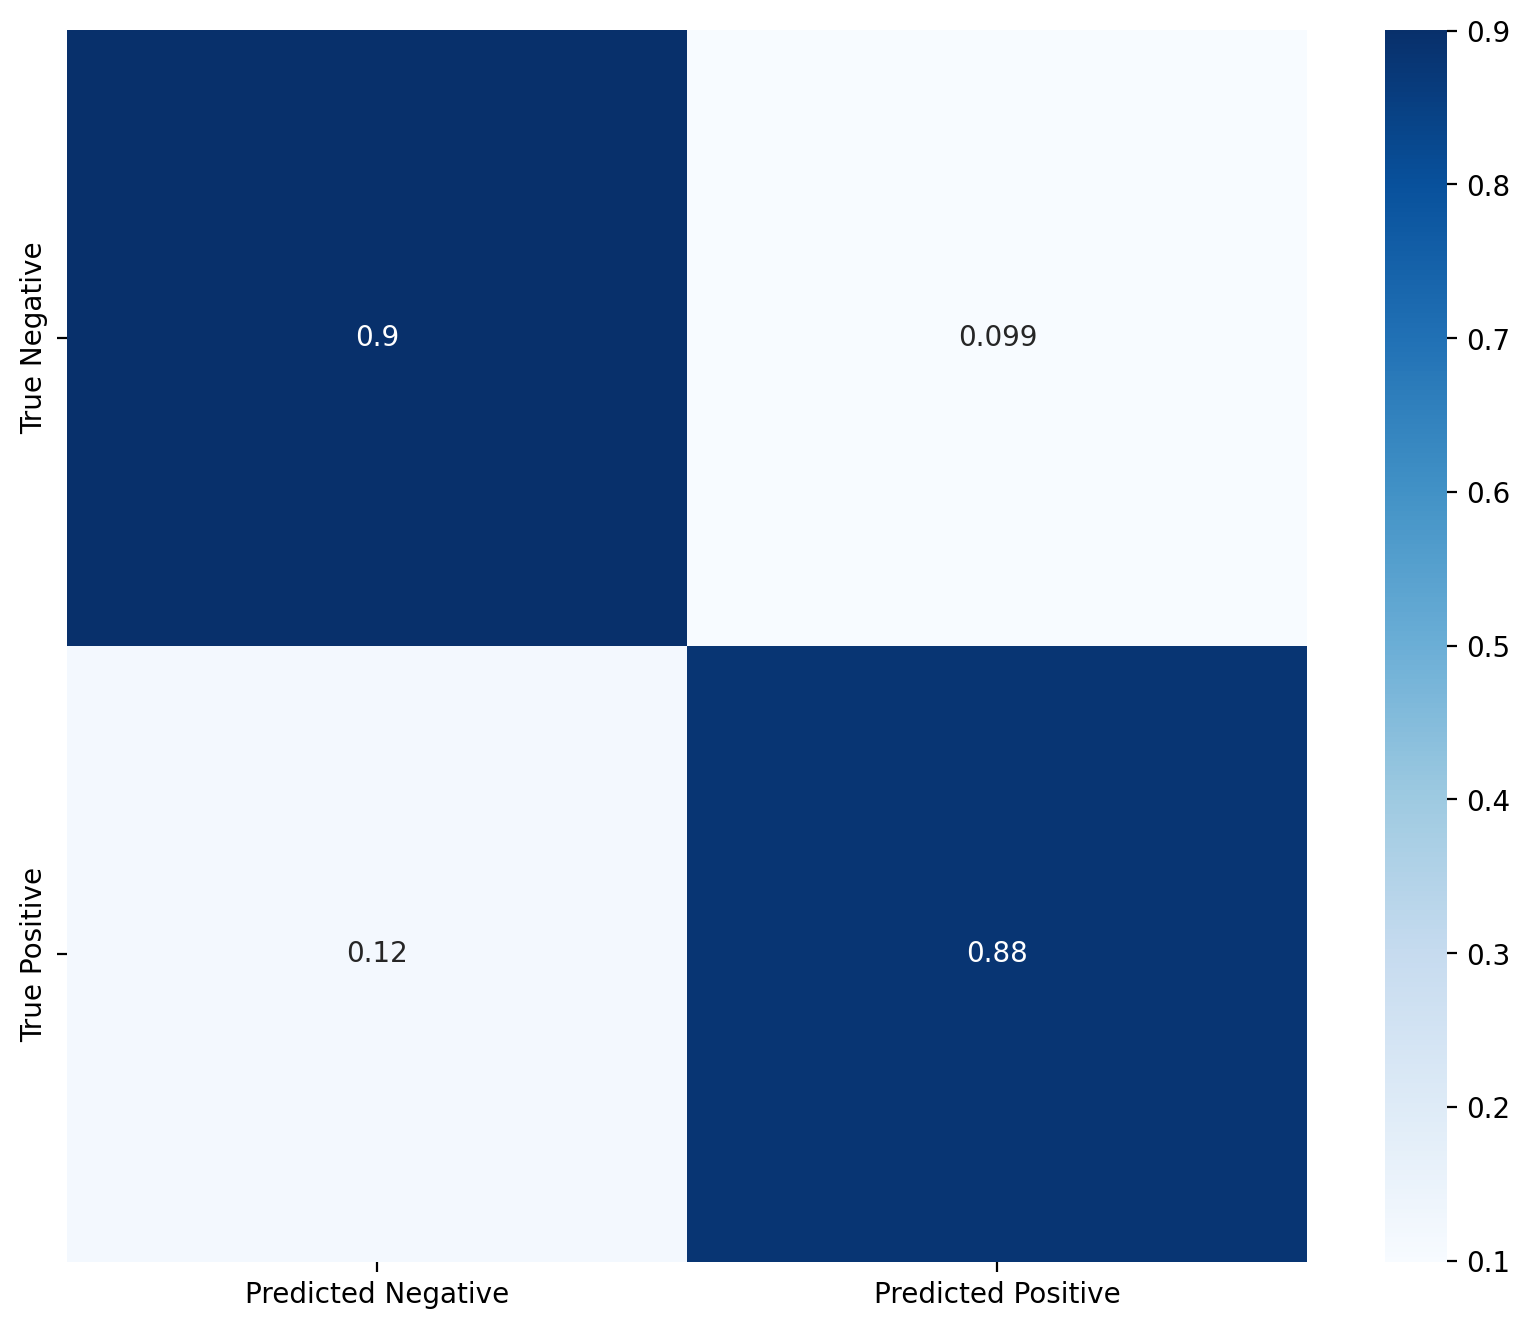

In [59]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(cf_df, annot=True, cmap='Blues')
plt.xticks()

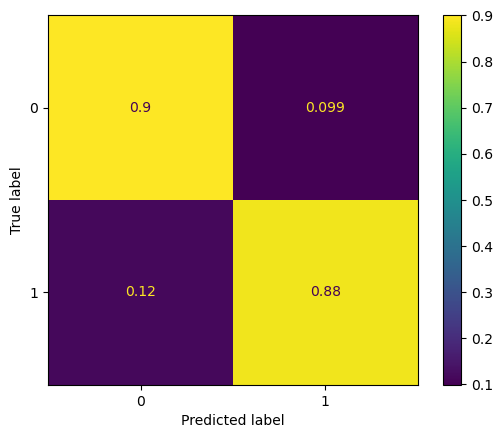

In [48]:
# the function expects the estimator, inputs and target as parameters
sklearn.metrics.plot_confusion_matrix(logreg_uni, X3_test_uni, y3_test, normalize='true');

In [42]:
y_proba = logreg_uni.predict_proba(X3_test_uni)[:,1]

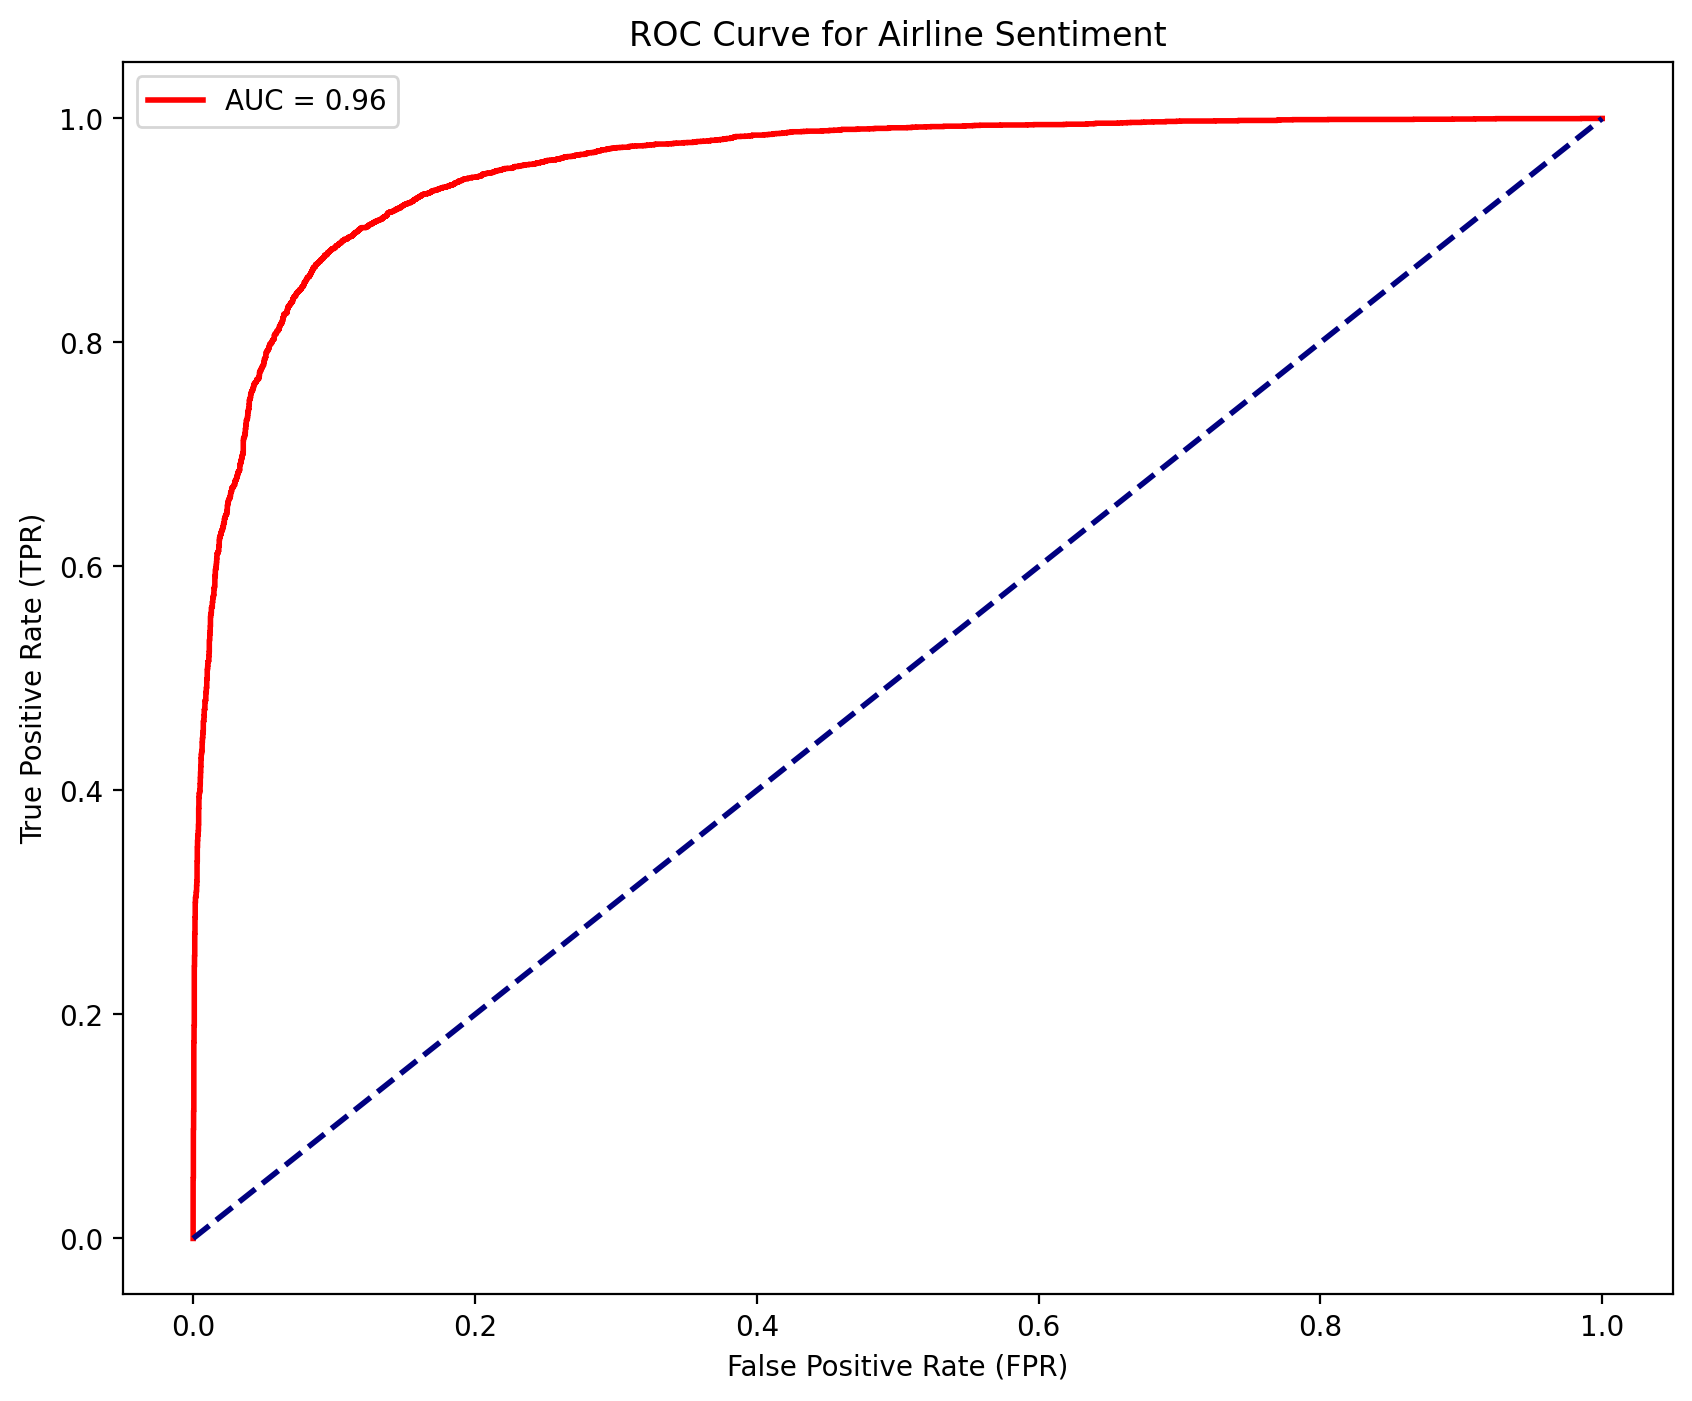

Area under curve (AUC):0.9566112055417003



<Figure size 640x480 with 0 Axes>

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

fprs, tprs, thresholds = roc_curve(y3_test, y_proba)
roc_auc = roc_auc_score(y3_test, y_proba)

plt.figure(figsize=(10,8))
plt.plot(fprs, tprs, color='red',
         lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Airline Sentiment')
plt.legend(loc="best")
plt.show()

plt.savefig("../ROC.png", transparent=True)

print(f'Area under curve (AUC):{roc_auc}')
print()



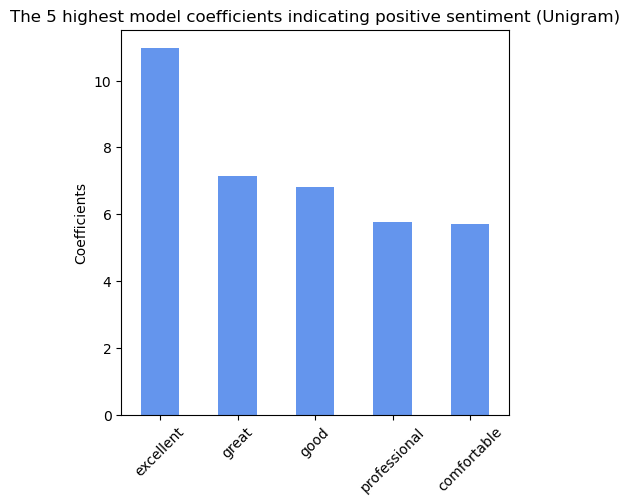

In [20]:
#plotting coefficients
best_pos_freq_uni = pd.DataFrame(
    {"coefficients": logreg_uni.coef_[0]},
    index=X3_uni.columns
).sort_values("coefficients", ascending=False)

best_pos_freq_uni.head(5).plot(kind="bar", figsize=(5, 5), legend=False, color='cornflowerblue')
plt.title("The 5 highest model coefficients indicating positive sentiment (Unigram)")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

In [21]:
best_pos_freq_uni.head(10)

,coefficients
excellent,10.968410
great,7.152585
good,6.825703
professional,5.764094
comfortable,5.716633
reviews,5.716378
efficient,5.486754
smooth,5.304186
pleasant,5.162733
attentive,5.040194


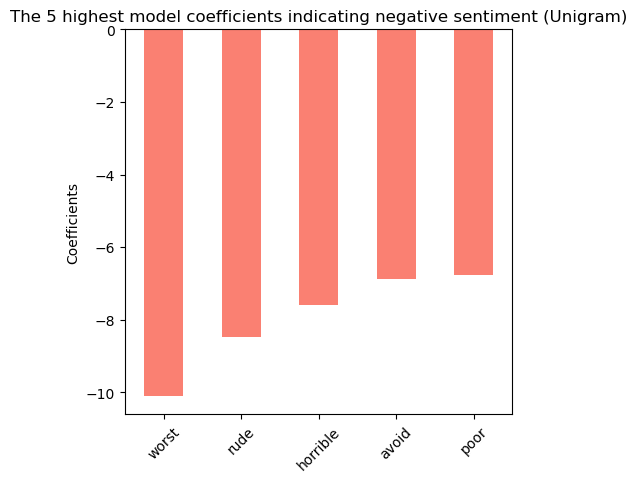

In [22]:
best_neg_freq_uni = pd.DataFrame(
    {"coefficients": logreg_uni.coef_[0]},
    index=X3_uni.columns
).sort_values("coefficients", ascending=True)

best_neg_freq_uni.head(5).plot(kind="bar", figsize=(5, 5), legend=False, color='salmon')
plt.title("The 5 highest model coefficients indicating negative sentiment (Unigram)")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

In [23]:
best_neg_freq_uni.head(10)

,coefficients
worst,-10.108940
rude,-8.478983
horrible,-7.586056
avoid,-6.879674
poor,-6.762428
terrible,-6.695019
uncomfortable,-6.639758
never,-6.622632
told,-5.686223
disappointed,-5.192478


In [24]:
# joblib.dump(best_logreg, "../model/logisticclassifier.pkl")

In [25]:
# pwd

In [26]:
# demo_df = joblib.load("../data/cleandf.pkl")

In [27]:
# demo_df.columns

In [28]:
# demo_review = demo_df['customer_review']
# y_rev = demo_df['recommended']

In [29]:
# # #Build pipeline

# text_clf = Pipeline([
#     ('tfidf', TfidfVectorizer(max_features=500, ngram_range=(2, 2))),
#     ('clf', LogisticRegression(C=10, max_iter=10000))
# ])

# text_clf.fit(demo_review, y_rev)


In [30]:
# joblib.dump(text_clf, "sentiment_pipeline.pkl")

In [31]:
pwd

'/Users/faisal/BS_Capstone/capstone-project-fai22399-git/notebooks'